# Gráficas entrenamiento

## Acumulado

✅ Datos cargados correctamente. Registros encontrados: 400
📈 Gráfica guardada: graficas_resultados/1_muertes.png


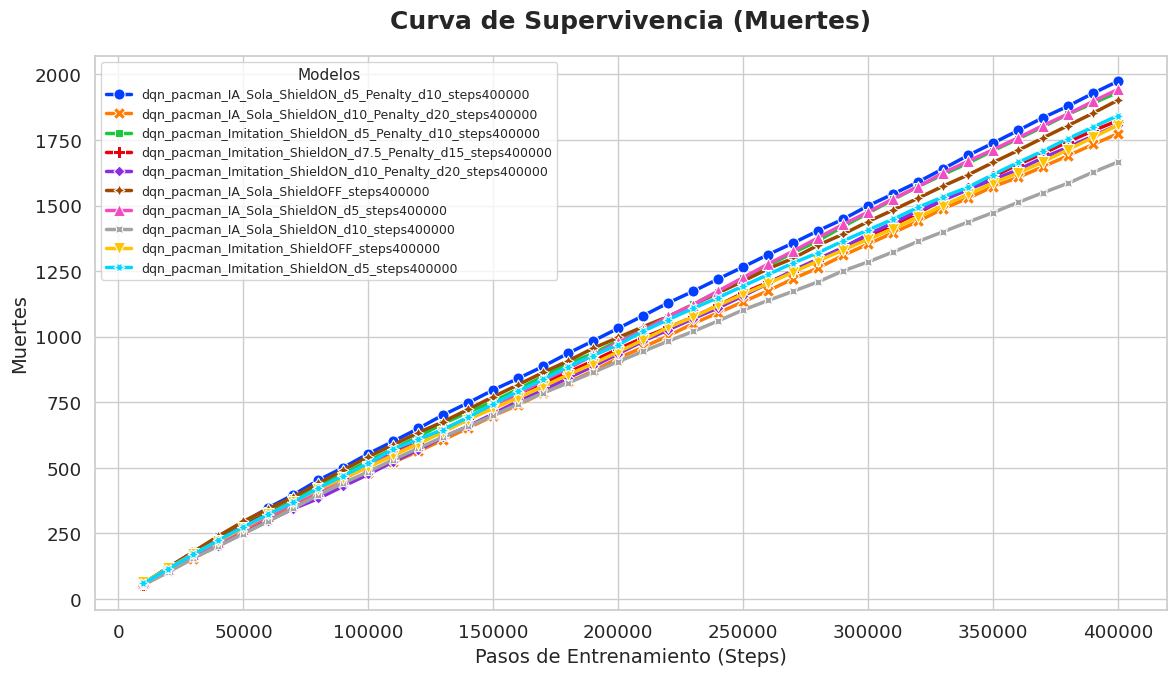

📈 Gráfica guardada: graficas_resultados/2_recompensa.png


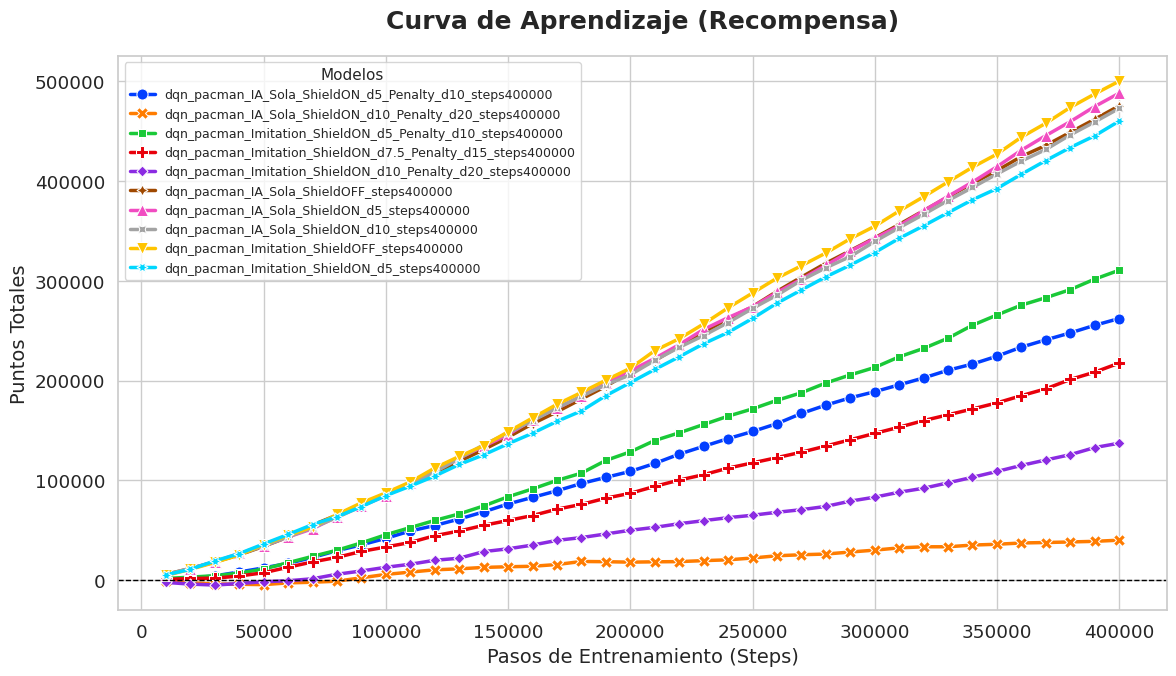

📈 Gráfica guardada: graficas_resultados/3_eficiencia.png


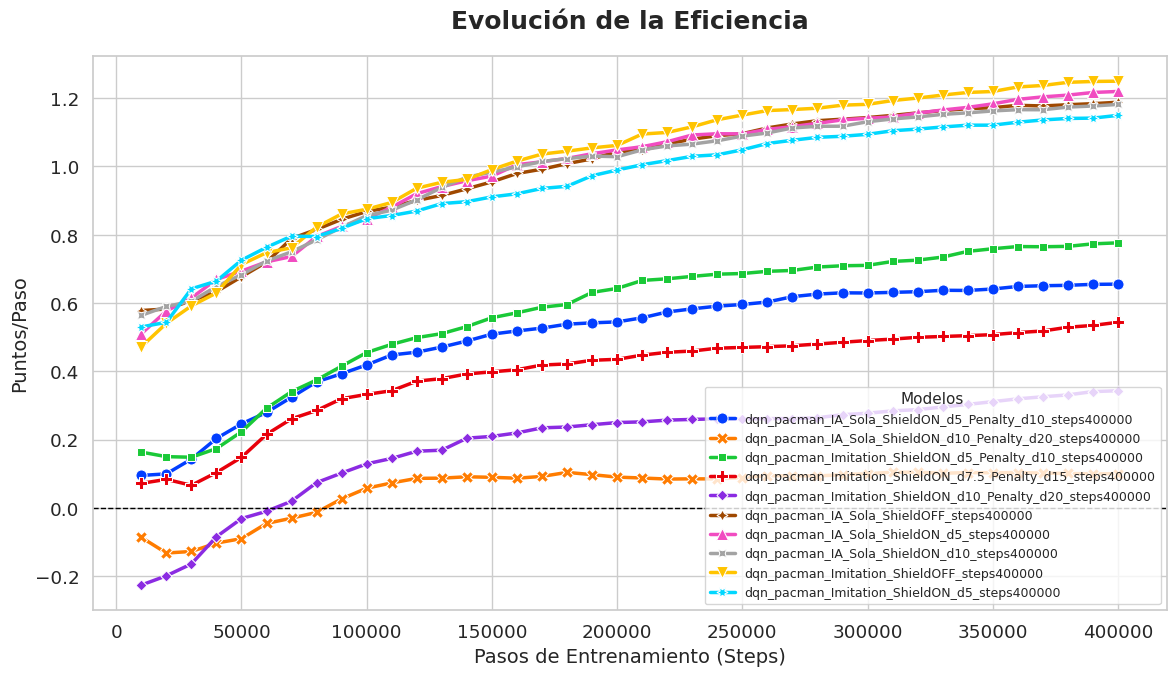

📈 Gráfica guardada: graficas_resultados/4_intervenciones.png


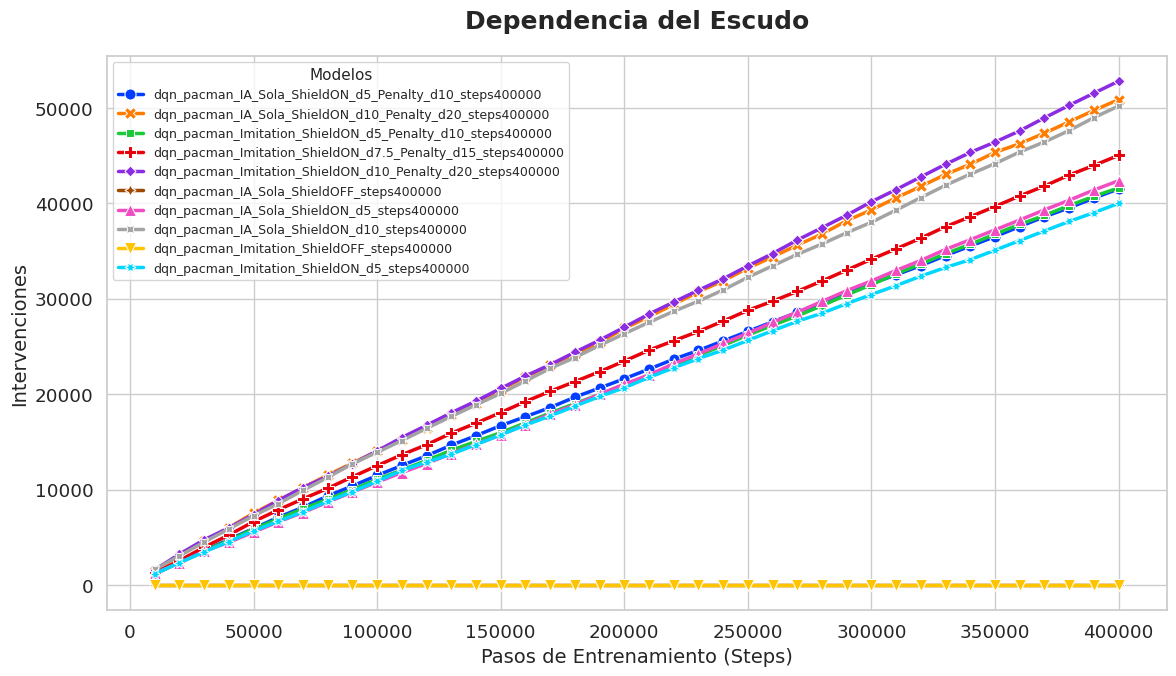

📈 Gráfica guardada: graficas_resultados/5_penalizaciones.png


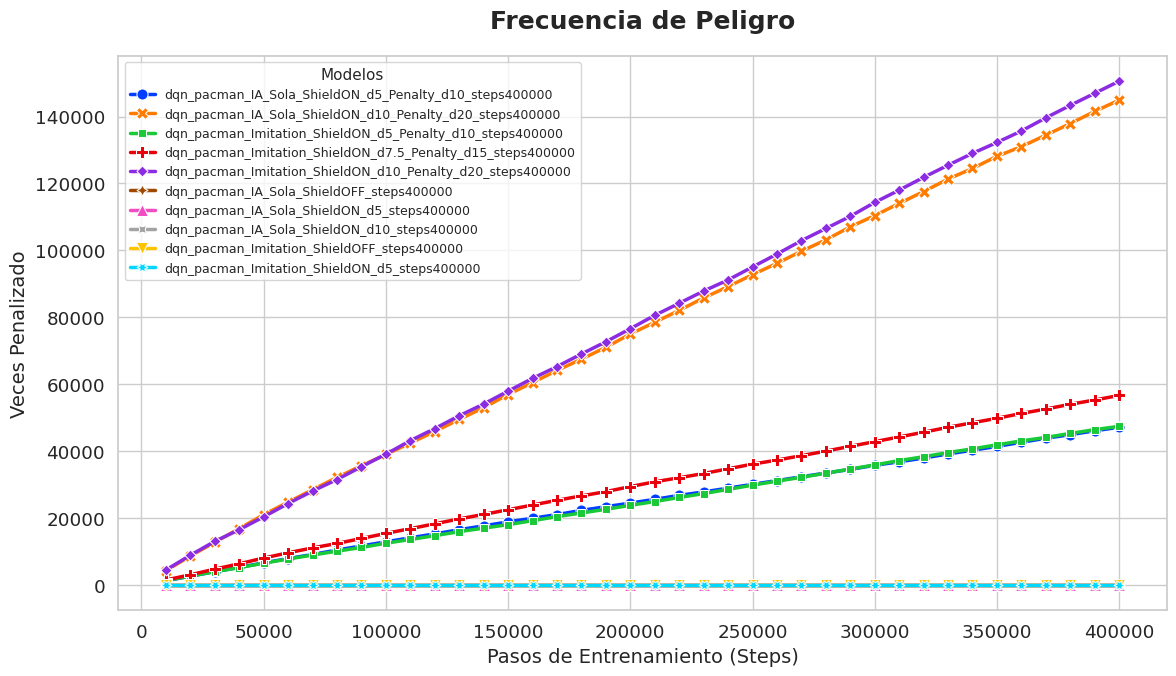


✨ Proceso finalizado.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

ARCHIVO_CSV = "historial_training.csv"
CARPETA_GRAFICAS = "graficas_resultados"
ESTILO = "whitegrid"
PALETA_COLORES = "bright"


def cargar_datos():
    if not os.path.exists(ARCHIVO_CSV):
        print(f"Error: No se encuentra el archivo '{ARCHIVO_CSV}'")
        return None

    df = pd.read_csv(ARCHIVO_CSV)
    print(f"✅ Datos cargados correctamente. Registros encontrados: {len(df)}")
    return df

def configurar_estilo():
    sns.set_theme(style=ESTILO)
    sns.set_context("notebook", font_scale=1.2)
    if not os.path.exists(CARPETA_GRAFICAS):
        os.makedirs(CARPETA_GRAFICAS)


def graficar_metrica(df, eje_y, titulo, etiqueta_y, nombre_archivo):
    plt.figure(figsize=(12, 7))

    ax = sns.lineplot(
        data=df,
        x="Step",
        y=eje_y,
        hue="Model_ID",
        style="Model_ID",
        markers=True,
        dashes=False,
        palette=PALETA_COLORES,
        linewidth=2.5,
        markersize=8
    )

    plt.title(titulo, fontsize=18, pad=20, fontweight='bold')
    plt.xlabel("Pasos de Entrenamiento (Steps)", fontsize=14)
    plt.ylabel(etiqueta_y, fontsize=14)

    if df[eje_y].min() < 0:
        plt.axhline(0, color='black', linewidth=1, linestyle='--')

    plt.legend(title="Modelos", loc='best', fontsize=9, title_fontsize=11, framealpha=0.8)

    plt.tight_layout()

    ruta = os.path.join(CARPETA_GRAFICAS, nombre_archivo)
    plt.savefig(ruta, dpi=300)
    print(f"📈 Gráfica guardada: {ruta}")

    plt.show()

    plt.close()

if __name__ == "__main__":
    configurar_estilo()
    df = cargar_datos()

    if df is not None:
        graficar_metrica(df, "Deaths", "Curva de Supervivencia (Muertes)", "Muertes", "1_muertes.png")

        graficar_metrica(df, "Reward_Accumulated", "Curva de Aprendizaje (Recompensa)", "Puntos Totales", "2_recompensa.png")

        graficar_metrica(df, "Efficiency", "Evolución de la Eficiencia", "Puntos/Paso", "3_eficiencia.png")

        if 'Interventions' in df.columns and df['Interventions'].sum() > 0:
            graficar_metrica(df, "Interventions", "Dependencia del Escudo", "Intervenciones", "4_intervenciones.png")

        if 'Penalties' in df.columns and df['Penalties'].sum() > 0:
             graficar_metrica(df, "Penalties", "Frecuencia de Peligro", "Veces Penalizado", "5_penalizaciones.png")

        print("\n✨ Proceso finalizado.")

## Por bloquesS

✅ Datos cargados correctamente. Registros totales: 400
📈 Gráfica guardada: graficas_resultados/1_muertes_tendencia.png


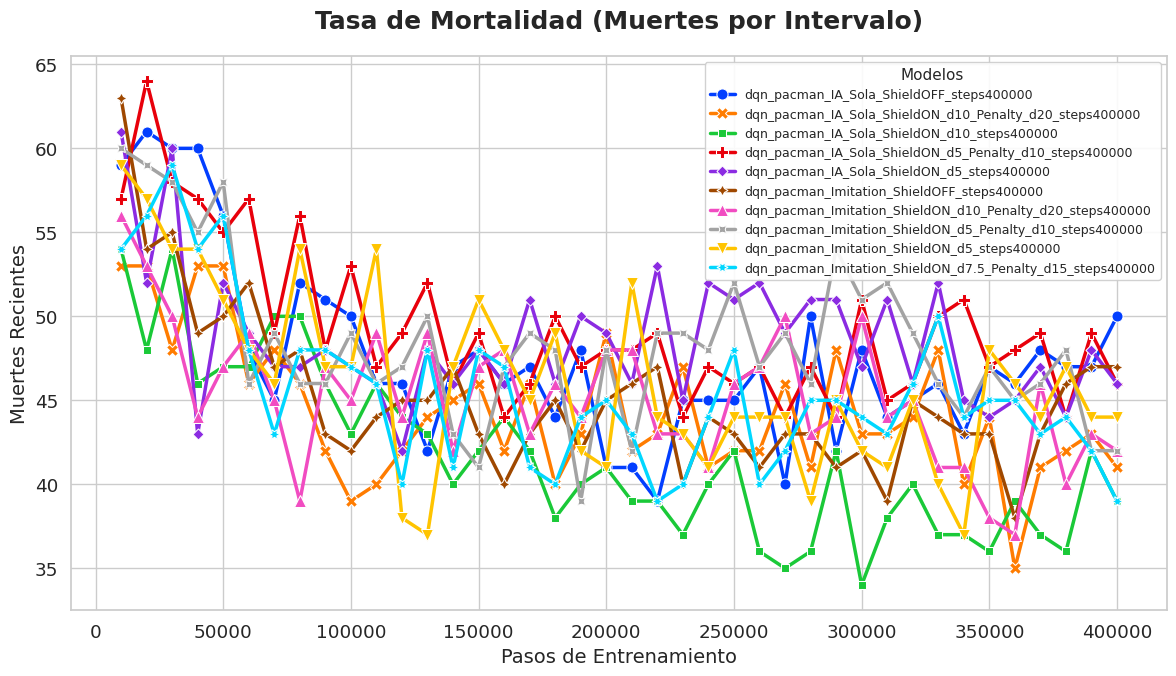

📈 Gráfica guardada: graficas_resultados/2_recompensa_tendencia.png


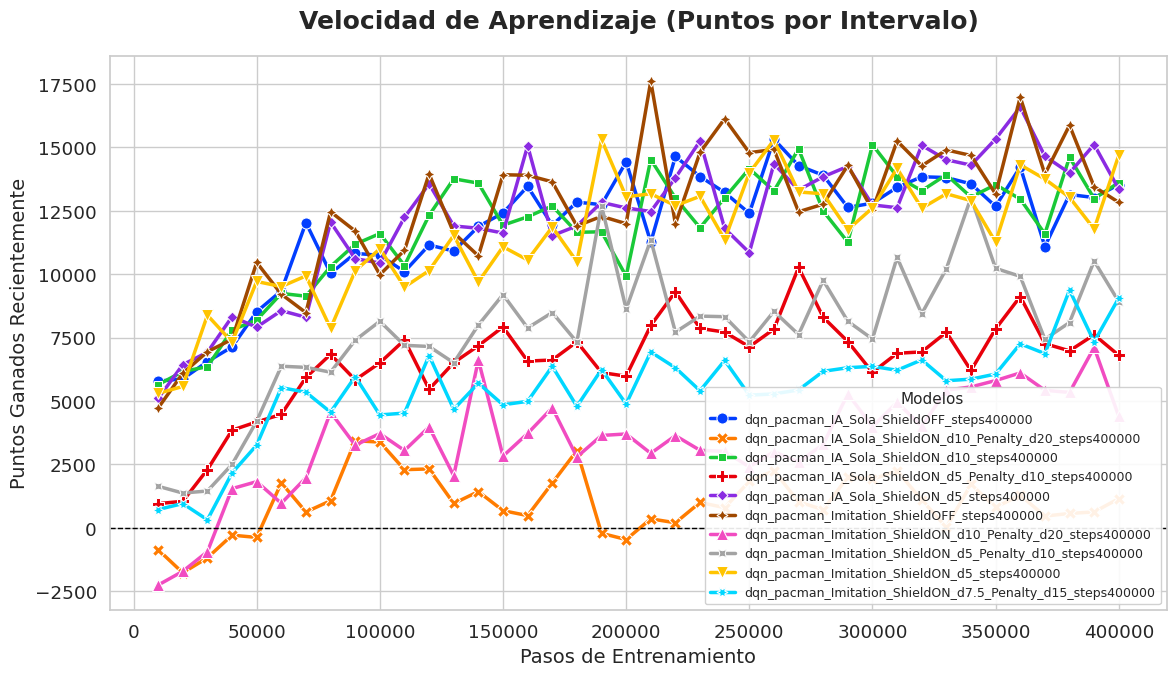

📈 Gráfica guardada: graficas_resultados/3_eficiencia_real.png


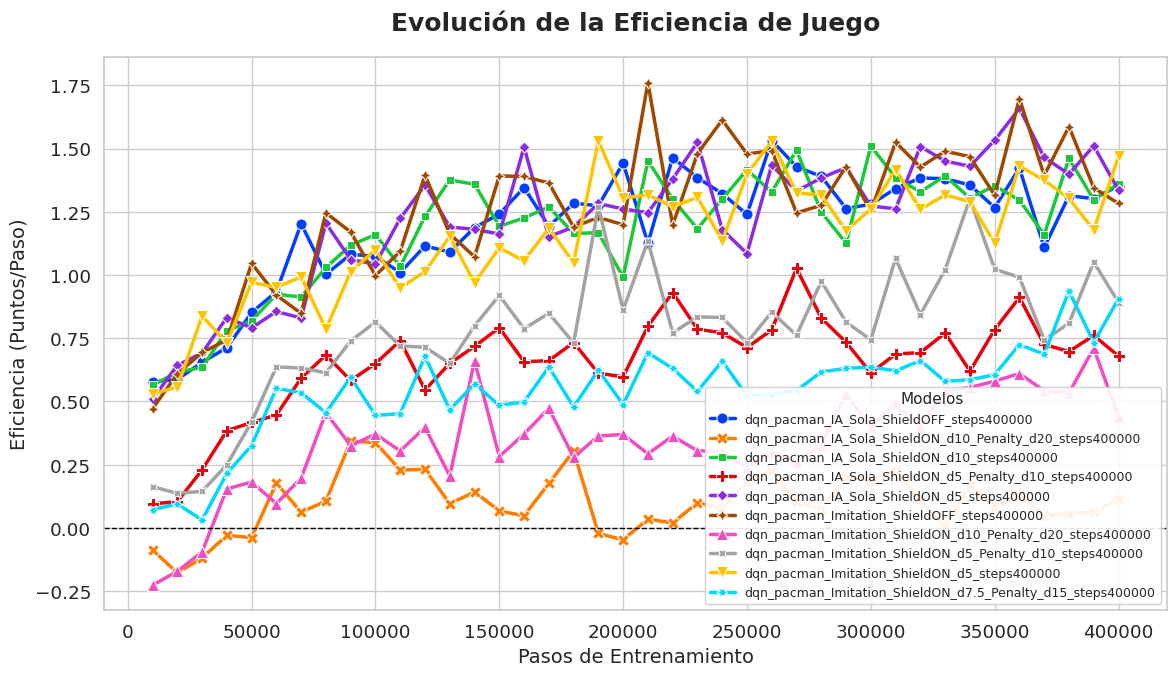

📈 Gráfica guardada: graficas_resultados/4_ppm_real.png


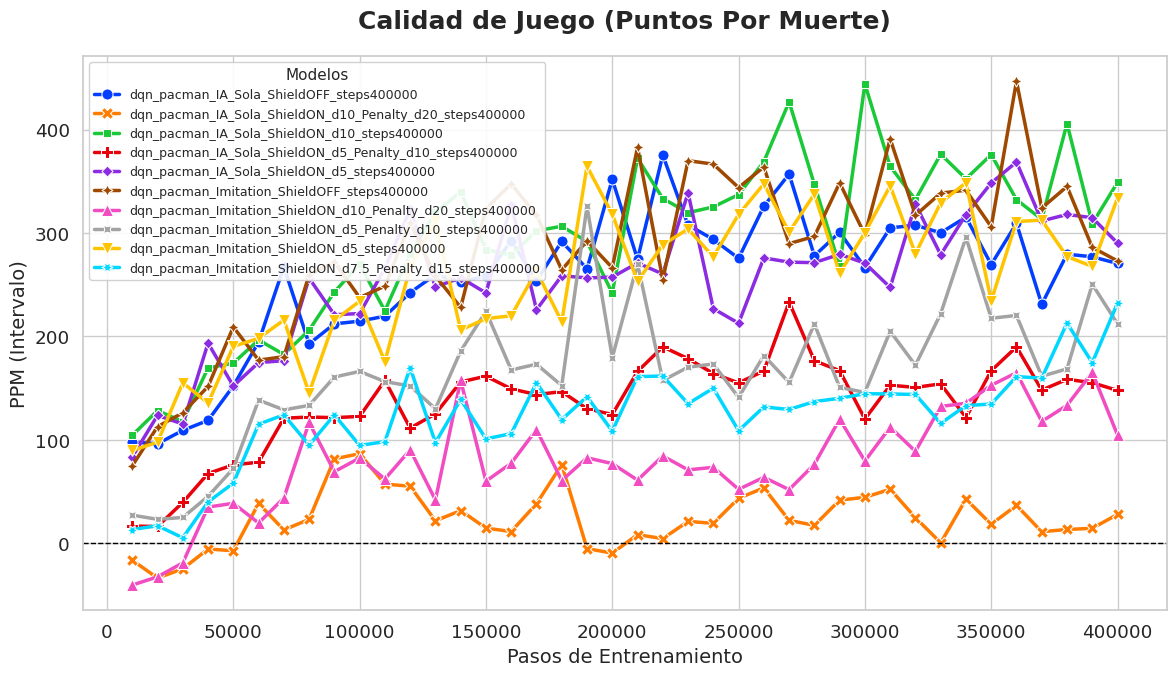

📈 Gráfica guardada: graficas_resultados/5_intervenciones.png


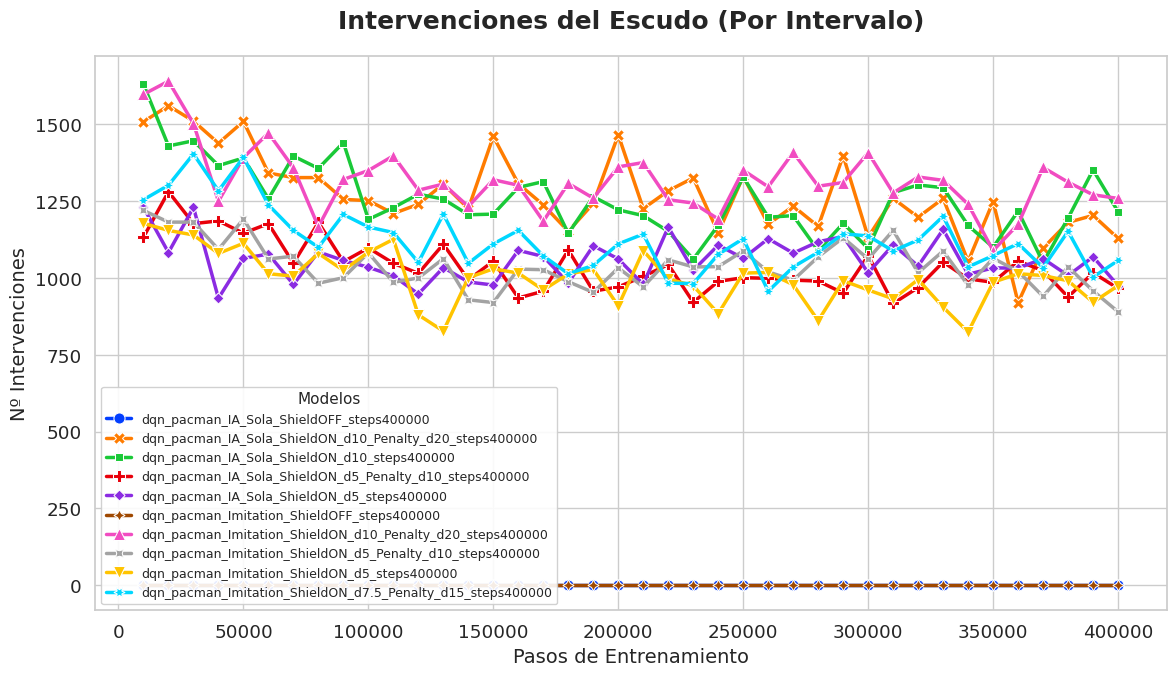


✨ ¡Gráficas diferenciales generadas con éxito!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

ARCHIVO_CSV = "historial_training.csv"
CARPETA_GRAFICAS = "graficas_resultados"
ESTILO = "whitegrid"
PALETA_COLORES = "bright"

def cargar_y_procesar_datos():
    if not os.path.exists(ARCHIVO_CSV):
        print(f"Error: No se encuentra el archivo '{ARCHIVO_CSV}'")
        return None

    df = pd.read_csv(ARCHIVO_CSV)
    print(f"Datos cargados correctamente. Registros totales: {len(df)}")

    df = df.sort_values(by=["Model_ID", "Step"])

    df["Delta_Step"] = df.groupby("Model_ID")["Step"].diff().fillna(df["Step"])

    metricas_acumuladas = ["Deaths", "Reward_Accumulated", "Interventions", "Penalties"]

    for metrica in metricas_acumuladas:
        if metrica in df.columns:
            nombre_intervalo = f"Interval_{metrica}"
            df[nombre_intervalo] = df.groupby("Model_ID")[metrica].diff()
            df[nombre_intervalo] = df[nombre_intervalo].fillna(df[metrica])

    if "Interval_Reward_Accumulated" in df.columns:
        df["Efficiency_Real"] = df["Interval_Reward_Accumulated"] / df["Delta_Step"]

    if "Interval_Reward_Accumulated" in df.columns and "Interval_Deaths" in df.columns:
        df["PPM_Real"] = df.apply(
            lambda row: row["Interval_Reward_Accumulated"] / row["Interval_Deaths"]
            if row["Interval_Deaths"] > 0 else row["Interval_Reward_Accumulated"],
            axis=1
        )

    return df

def configurar_estilo():
    sns.set_theme(style=ESTILO)
    sns.set_context("notebook", font_scale=1.2)
    if not os.path.exists(CARPETA_GRAFICAS):
        os.makedirs(CARPETA_GRAFICAS)


def graficar_metrica(df, eje_y, titulo, etiqueta_y, nombre_archivo):
    plt.figure(figsize=(12, 7))

    if eje_y not in df.columns:
        return 

    ax = sns.lineplot(
        data=df,
        x="Step",
        y=eje_y,
        hue="Model_ID",
        style="Model_ID",
        markers=True,
        dashes=False,
        palette=PALETA_COLORES,
        linewidth=2.5,
        markersize=8
    )

    plt.title(titulo, fontsize=18, pad=20, fontweight='bold')
    plt.xlabel("Pasos de Entrenamiento", fontsize=14)
    plt.ylabel(etiqueta_y, fontsize=14)

    if df[eje_y].min() < 0:
        plt.axhline(0, color='black', linewidth=1, linestyle='--')

    plt.legend(title="Modelos", loc='best', fontsize=9, title_fontsize=11, framealpha=0.9)

    plt.tight_layout()

    ruta = os.path.join(CARPETA_GRAFICAS, nombre_archivo)
    plt.savefig(ruta, dpi=300)
    print(f"📈 Gráfica guardada: {ruta}")
    plt.show()
    plt.close()

if __name__ == "__main__":
    configurar_estilo()
    df_procesado = cargar_y_procesar_datos()

    if df_procesado is not None:

        graficar_metrica(
            df_procesado,
            eje_y="Interval_Deaths",
            titulo="Tasa de Mortalidad (Muertes por Intervalo)",
            etiqueta_y="Muertes Recientes",
            nombre_archivo="1_muertes_tendencia.png"
        )

        graficar_metrica(
            df_procesado,
            eje_y="Interval_Reward_Accumulated",
            titulo="Velocidad de Aprendizaje (Puntos por Intervalo)",
            etiqueta_y="Puntos Ganados Recientemente",
            nombre_archivo="2_recompensa_tendencia.png"
        )

        graficar_metrica(
            df_procesado,
            eje_y="Efficiency_Real",
            titulo="Evolución de la Eficiencia de Juego",
            etiqueta_y="Eficiencia (Puntos/Paso)",
            nombre_archivo="3_eficiencia_real.png"
        )

        graficar_metrica(
            df_procesado,
            eje_y="PPM_Real",
            titulo="Calidad de Juego (Puntos Por Muerte)",
            etiqueta_y="PPM (Intervalo)",
            nombre_archivo="4_ppm_real.png"
        )

        if "Interval_Interventions" in df_procesado.columns and df_procesado["Interval_Interventions"].sum() > 0:
            graficar_metrica(
                df_procesado,
                eje_y="Interval_Interventions",
                titulo="Intervenciones del Escudo (Por Intervalo)",
                etiqueta_y="Nº Intervenciones",
                nombre_archivo="5_intervenciones.png"
            )

        print("\n✨ ¡Gráficas diferenciales generadas con éxito!")

## GRÁFICAS Evaluación

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


CSV_PATH = "/content/sample_data/historial_training.csv"

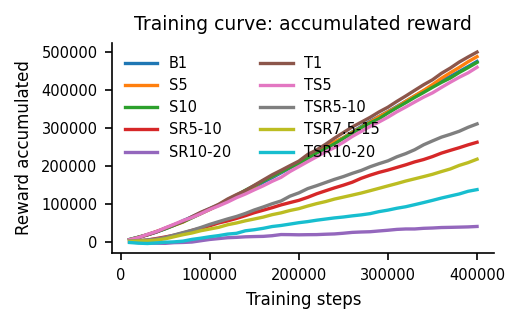

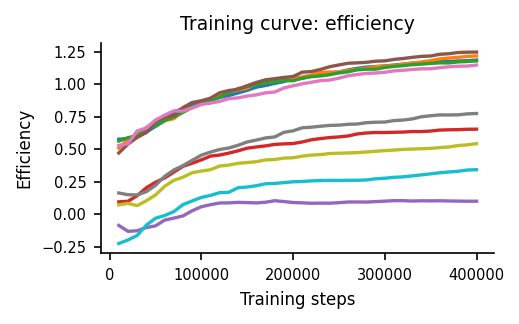

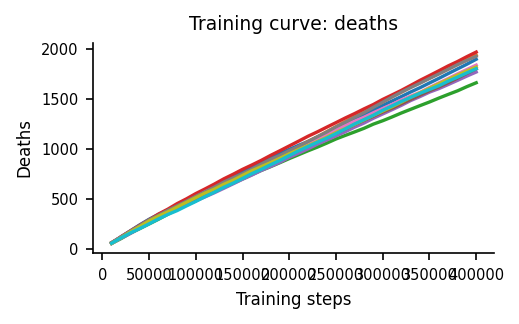

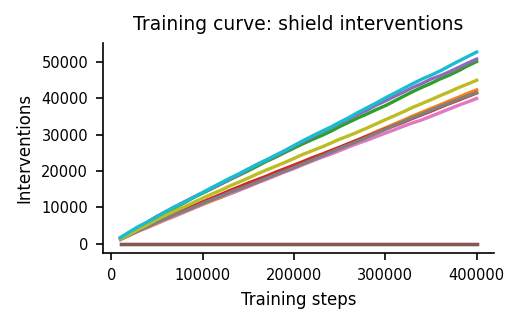

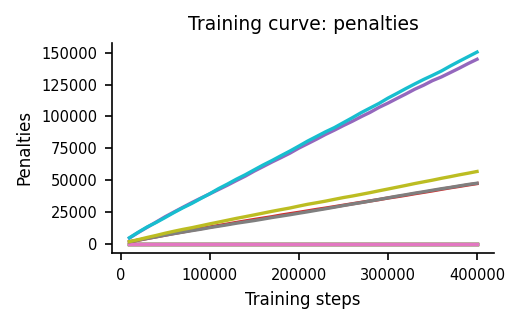

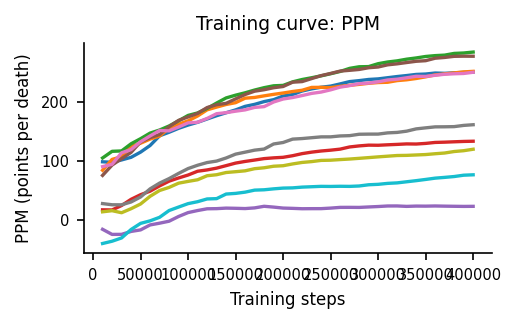

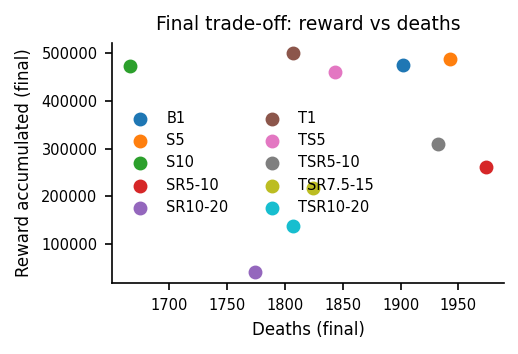

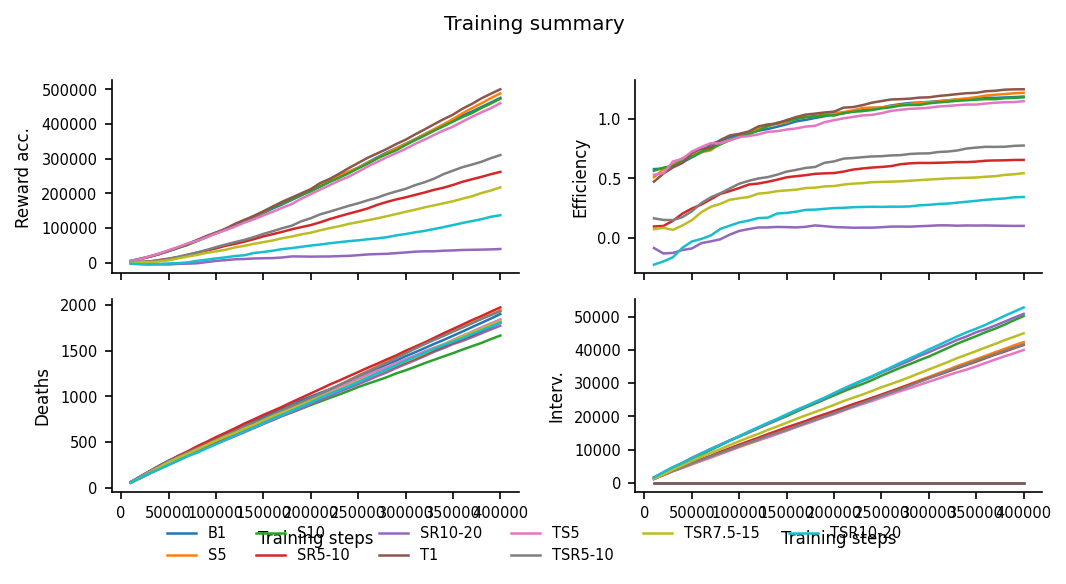

In [ ]:

plt.rcParams.update({
    "figure.dpi": 150,
    "font.size": 8,            
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

IEEE_1COL_W = 3.5   
IEEE_2COL_W = 7.16  

df = pd.read_csv(CSV_PATH).sort_values(["Model_ID", "Step"]).reset_index(drop=True)

required_cols = [
    "Model_ID", "Imitation", "Shield_Active", "Shield_Dist",
    "Reward_Active", "Reward_Dist", "Step", "Deaths",
    "Reward_Accumulated", "Efficiency", "PPM", "Interventions", "Penalties"
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas en el CSV: {missing}")

def short_id(row: pd.Series) -> str:
    T = bool(row["Imitation"])
    S = bool(row["Shield_Active"])
    R = bool(row["Reward_Active"])
    dS = float(row["Shield_Dist"])
    dR = float(row["Reward_Dist"])

    if (not T) and (not S) and (not R):
        return "B1"   
    if T and (not S) and (not R):
        return "T1"   

    if (not T) and S and (not R):
        return f"S{dS:g}"
    if T and S and (not R):
        return f"TS{dS:g}"

    if (not T) and S and R:
        return f"SR{dS:g}-{dR:g}"
    if T and S and R:
        return f"TSR{dS:g}-{dR:g}"

    if (not T) and (not S) and R:
        return f"R{dR:g}"
    if T and (not S) and R:
        return f"TR{dR:g}"

    return "UNK"

cfg = df[["Model_ID","Imitation","Shield_Active","Shield_Dist","Reward_Active","Reward_Dist"]].drop_duplicates().copy()
cfg["Exp_ID"] = cfg.apply(short_id, axis=1)
model_to_exp = dict(zip(cfg["Model_ID"], cfg["Exp_ID"]))
df["Exp_ID"] = df["Model_ID"].map(model_to_exp)

preferred_order = [
    "B1", "S5", "S10", "SR5-10", "SR10-20",
    "T1", "TS5", "TS10", "TSR5-10", "TSR7.5-15", "TSR10-20"
]
present = [x for x in preferred_order if x in set(df["Exp_ID"])]
present += [x for x in sorted(df["Exp_ID"].unique()) if x not in present]


def plot_lines(metric: str, ylabel: str, title: str, width=IEEE_1COL_W, height=2.2,
               legend=True, legend_ncol=2):
    """Curva por configuración (una run por config)."""
    fig, ax = plt.subplots(figsize=(width, height))
    for exp_id in present:
        sub = df[df["Exp_ID"] == exp_id].sort_values("Step")
        if sub.empty:
            continue
        ax.plot(sub["Step"], sub[metric], linewidth=1.6, label=exp_id)

    ax.set_xlabel("Training steps")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if legend:
        ax.legend(ncol=legend_ncol, frameon=False, handlelength=2.2)
    plt.tight_layout()
    plt.show()


plot_lines(
    metric="Reward_Accumulated",
    ylabel="Reward accumulated",
    title="Training curve: accumulated reward",
    width=IEEE_1COL_W, height=2.2,
    legend=True, legend_ncol=2
)


plot_lines(
    metric="Efficiency",
    ylabel="Efficiency",
    title="Training curve: efficiency",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Deaths",
    ylabel="Deaths",
    title="Training curve: deaths",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Interventions",
    ylabel="Interventions",
    title="Training curve: shield interventions",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Penalties",
    ylabel="Penalties",
    title="Training curve: penalties",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)

plot_lines(
    metric="PPM",
    ylabel="PPM (points per death)",
    title="Training curve: PPM",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


last = df.sort_values("Step").groupby("Model_ID", as_index=False).tail(1).copy()
last["Exp_ID"] = last["Model_ID"].map(model_to_exp)

fig, ax = plt.subplots(figsize=(IEEE_1COL_W, 2.4))
for exp_id in present:
    sub = last[last["Exp_ID"] == exp_id]
    if sub.empty:
        continue
    ax.scatter(sub["Deaths"], sub["Reward_Accumulated"], s=32, label=exp_id)

ax.set_xlabel("Deaths (final)")
ax.set_ylabel("Reward accumulated (final)")
ax.set_title("Final trade-off: reward vs deaths")
ax.legend(ncol=2, frameon=False)
plt.tight_layout()
plt.show()


metrics = [
    ("Reward_Accumulated", "Reward acc."),
    ("Efficiency", "Efficiency"),
    ("Deaths", "Deaths"),
    ("Interventions", "Interv."),
]

fig, axes = plt.subplots(2, 2, figsize=(IEEE_2COL_W, 3.6), sharex=True)
axes = axes.ravel()

for ax, (m, yl) in zip(axes, metrics):
    for exp_id in present:
        sub = df[df["Exp_ID"] == exp_id].sort_values("Step")
        if sub.empty:
            continue
        ax.plot(sub["Step"], sub[m], linewidth=1.2, label=exp_id)
    ax.set_ylabel(yl)

axes[2].set_xlabel("Training steps")
axes[3].set_xlabel("Training steps")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=6, frameon=False, bbox_to_anchor=(0.5, -0.02))

fig.suptitle("Training summary", y=1.02)
plt.tight_layout()
plt.show()

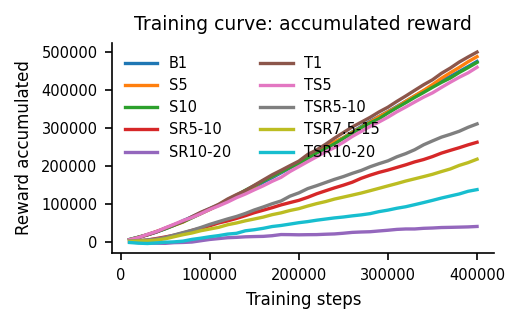

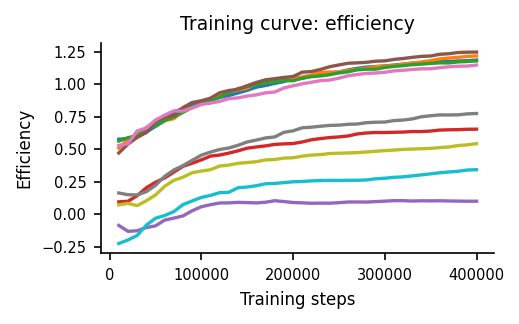

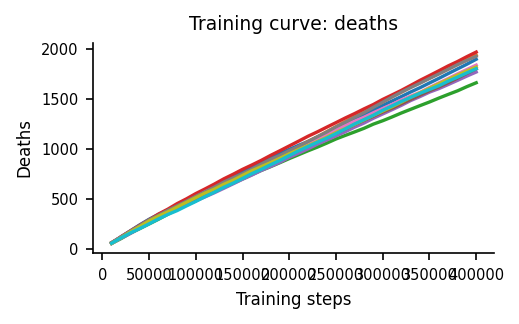

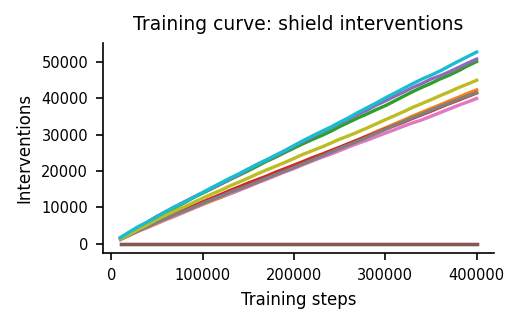

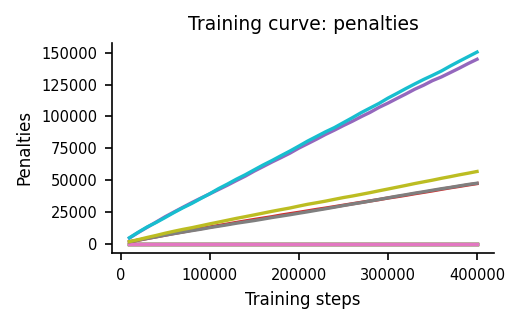

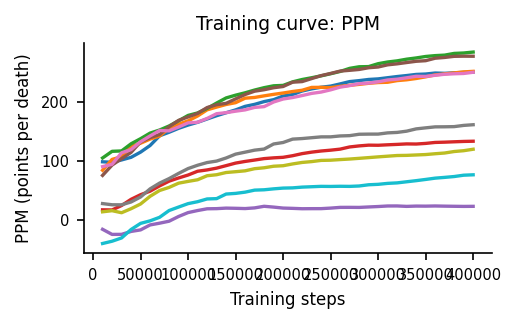

/tmp/ipython-input-3387796780.py:196: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("Model_ID", group_keys=False).apply(add_windowed)


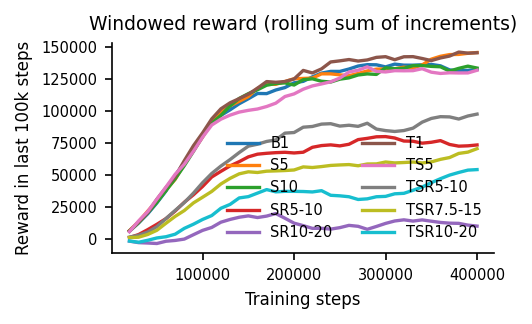

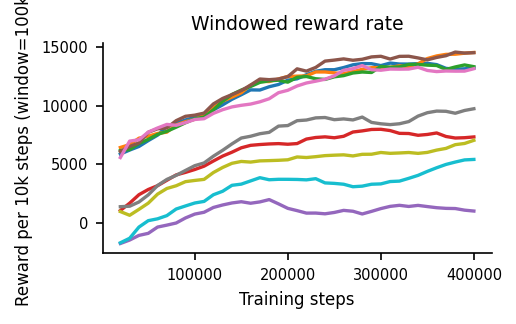

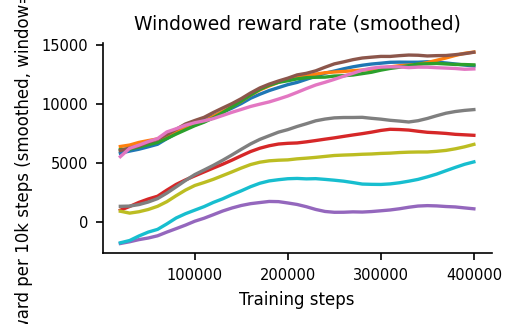

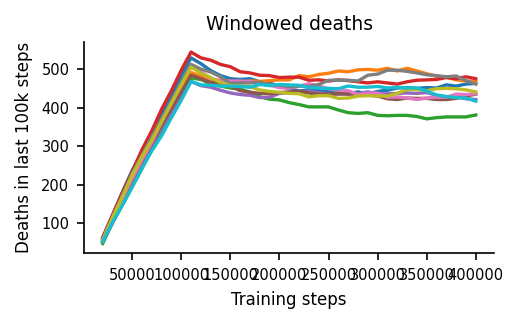

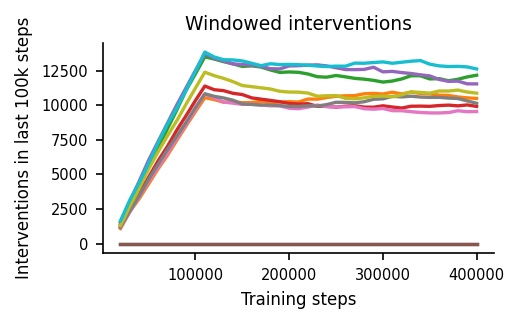

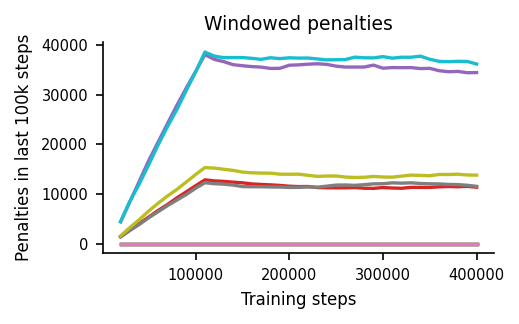

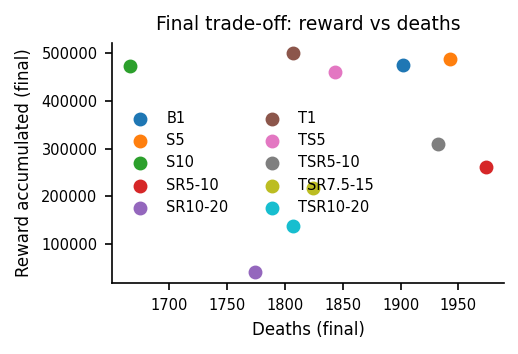

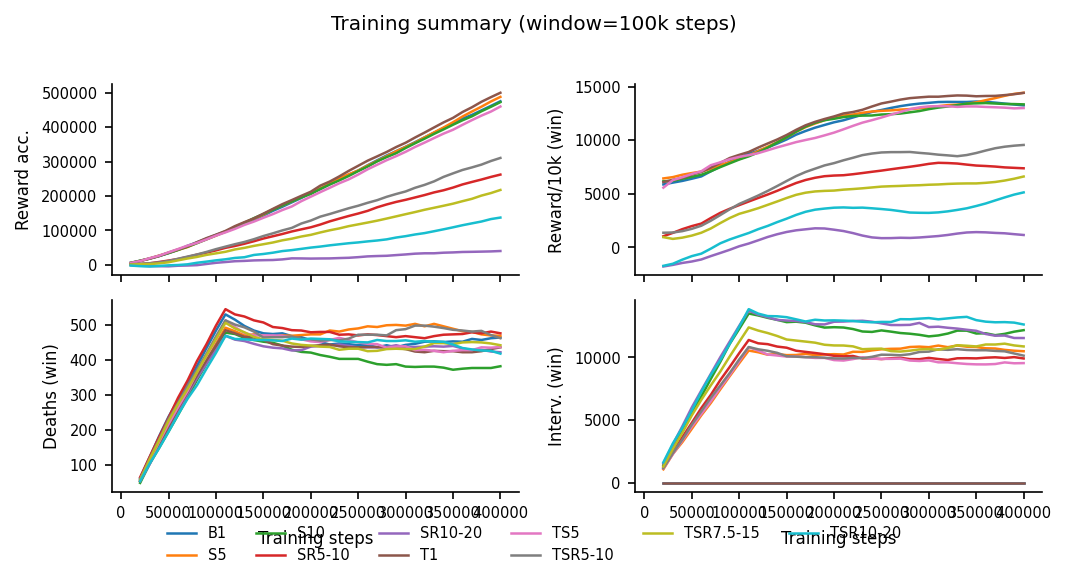

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "font.size": 8,            
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

IEEE_1COL_W = 3.5   
IEEE_2COL_W = 7.16  

df = pd.read_csv(CSV_PATH).sort_values(["Model_ID", "Step"]).reset_index(drop=True)

required_cols = [
    "Model_ID", "Imitation", "Shield_Active", "Shield_Dist",
    "Reward_Active", "Reward_Dist", "Step", "Deaths",
    "Reward_Accumulated", "Efficiency", "PPM", "Interventions", "Penalties"
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas en el CSV: {missing}")

def short_id(row: pd.Series) -> str:
    T = bool(row["Imitation"])
    S = bool(row["Shield_Active"])
    R = bool(row["Reward_Active"])
    dS = float(row["Shield_Dist"])
    dR = float(row["Reward_Dist"])

    if (not T) and (not S) and (not R):
        return "B1" 
    if T and (not S) and (not R):
        return "T1"  

    if (not T) and S and (not R):
        return f"S{dS:g}"
    if T and S and (not R):
        return f"TS{dS:g}"

    if (not T) and S and R:
        return f"SR{dS:g}-{dR:g}"
    if T and S and R:
        return f"TSR{dS:g}-{dR:g}"

    if (not T) and (not S) and R:
        return f"R{dR:g}"
    if T and (not S) and R:
        return f"TR{dR:g}"

    return "UNK"

cfg = df[["Model_ID","Imitation","Shield_Active","Shield_Dist","Reward_Active","Reward_Dist"]].drop_duplicates().copy()
cfg["Exp_ID"] = cfg.apply(short_id, axis=1)
model_to_exp = dict(zip(cfg["Model_ID"], cfg["Exp_ID"]))
df["Exp_ID"] = df["Model_ID"].map(model_to_exp)


preferred_order = [
    "B1", "S5", "S10", "SR5-10", "SR10-20",
    "T1", "TS5", "TS10", "TSR5-10", "TSR7.5-15", "TSR10-20"
]
present = [x for x in preferred_order if x in set(df["Exp_ID"])]
present += [x for x in sorted(df["Exp_ID"].unique()) if x not in present]


def plot_lines(metric: str, ylabel: str, title: str, width=IEEE_1COL_W, height=2.2,
               legend=True, legend_ncol=2):
    """Curva por configuración (una run por config)."""
    fig, ax = plt.subplots(figsize=(width, height))
    for exp_id in present:
        sub = df[df["Exp_ID"] == exp_id].sort_values("Step")
        if sub.empty:
            continue
        ax.plot(sub["Step"], sub[metric], linewidth=1.6, label=exp_id)

    ax.set_xlabel("Training steps")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if legend:
        ax.legend(ncol=legend_ncol, frameon=False, handlelength=2.2)
    plt.tight_layout()
    plt.show()



plot_lines(
    metric="Reward_Accumulated",
    ylabel="Reward accumulated",
    title="Training curve: accumulated reward",
    width=IEEE_1COL_W, height=2.2,
    legend=True, legend_ncol=2
)


plot_lines(
    metric="Efficiency",
    ylabel="Efficiency",
    title="Training curve: efficiency",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Deaths",
    ylabel="Deaths",
    title="Training curve: deaths",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Interventions",
    ylabel="Interventions",
    title="Training curve: shield interventions",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="Penalties",
    ylabel="Penalties",
    title="Training curve: penalties",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


plot_lines(
    metric="PPM",
    ylabel="PPM (points per death)",
    title="Training curve: PPM",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)



WINDOW_STEPS = 100_000

df = df.sort_values(["Model_ID", "Step"]).reset_index(drop=True)


df["d_step"]   = df.groupby("Model_ID")["Step"].diff()
df["d_reward"] = df.groupby("Model_ID")["Reward_Accumulated"].diff()
df["d_deaths"] = df.groupby("Model_ID")["Deaths"].diff()
df["d_interv"] = df.groupby("Model_ID")["Interventions"].diff()
df["d_pen"]    = df.groupby("Model_ID")["Penalties"].diff()

def add_windowed(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("Step").copy()

    step_interval = g["d_step"].dropna().median()
    if pd.isna(step_interval) or step_interval <= 0:
        step_interval = 1.0

    window_points = int(max(1, round(WINDOW_STEPS / step_interval)))

    g["Reward_Window"] = g["d_reward"].rolling(window_points, min_periods=1).sum()
    g["Deaths_Window"] = g["d_deaths"].rolling(window_points, min_periods=1).sum()
    g["Interv_Window"] = g["d_interv"].rolling(window_points, min_periods=1).sum()
    g["Pen_Window"]    = g["d_pen"].rolling(window_points, min_periods=1).sum()

    g["Steps_Window"] = g["d_step"].rolling(window_points, min_periods=1).sum()

    g["Reward_Rate_Window"] = g["Reward_Window"] / g["Steps_Window"]
    g["Reward_Rate_Window_10k"] = g["Reward_Rate_Window"] * 10_000

    g["Reward_Rate_Smooth_10k"] = g["Reward_Rate_Window_10k"].rolling(
        max(2, window_points // 2), min_periods=1
    ).mean()

    return g

df = df.groupby("Model_ID", group_keys=False).apply(add_windowed)



plot_lines(
    metric="Reward_Window",
    ylabel=f"Reward in last {WINDOW_STEPS//1000}k steps",
    title="Windowed reward (rolling sum of increments)",
    width=IEEE_1COL_W, height=2.2,
    legend=True, legend_ncol=2
)

plot_lines(
    metric="Reward_Rate_Window_10k",
    ylabel=f"Reward per 10k steps (window={WINDOW_STEPS//1000}k)",
    title="Windowed reward rate",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)

plot_lines(
    metric="Reward_Rate_Smooth_10k",
    ylabel=f"Reward per 10k steps (smoothed, window={WINDOW_STEPS//1000}k)",
    title="Windowed reward rate (smoothed)",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)

plot_lines(
    metric="Deaths_Window",
    ylabel=f"Deaths in last {WINDOW_STEPS//1000}k steps",
    title="Windowed deaths",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)

plot_lines(
    metric="Interv_Window",
    ylabel=f"Interventions in last {WINDOW_STEPS//1000}k steps",
    title="Windowed interventions",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)

plot_lines(
    metric="Pen_Window",
    ylabel=f"Penalties in last {WINDOW_STEPS//1000}k steps",
    title="Windowed penalties",
    width=IEEE_1COL_W, height=2.2,
    legend=False
)


last = df.sort_values("Step").groupby("Model_ID", as_index=False).tail(1).copy()
last["Exp_ID"] = last["Model_ID"].map(model_to_exp)

fig, ax = plt.subplots(figsize=(IEEE_1COL_W, 2.4))
for exp_id in present:
    sub = last[last["Exp_ID"] == exp_id]
    if sub.empty:
        continue
    ax.scatter(sub["Deaths"], sub["Reward_Accumulated"], s=32, label=exp_id)

ax.set_xlabel("Deaths (final)")
ax.set_ylabel("Reward accumulated (final)")
ax.set_title("Final trade-off: reward vs deaths")
ax.legend(ncol=2, frameon=False)
plt.tight_layout()
plt.show()


metrics = [
    ("Reward_Accumulated", "Reward acc."),
    ("Reward_Rate_Smooth_10k", "Reward/10k (win)"),
    ("Deaths_Window", "Deaths (win)"),
    ("Interv_Window", "Interv. (win)"),
]

fig, axes = plt.subplots(2, 2, figsize=(IEEE_2COL_W, 3.6), sharex=True)
axes = axes.ravel()

for ax, (m, yl) in zip(axes, metrics):
    for exp_id in present:
        sub = df[df["Exp_ID"] == exp_id].sort_values("Step")
        if sub.empty:
            continue
        ax.plot(sub["Step"], sub[m], linewidth=1.2, label=exp_id)
    ax.set_ylabel(yl)

axes[2].set_xlabel("Training steps")
axes[3].set_xlabel("Training steps")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=6, frameon=False, bbox_to_anchor=(0.5, -0.02))
fig.suptitle(f"Training summary (window={WINDOW_STEPS//1000}k steps)", y=1.02)
plt.tight_layout()
plt.show()


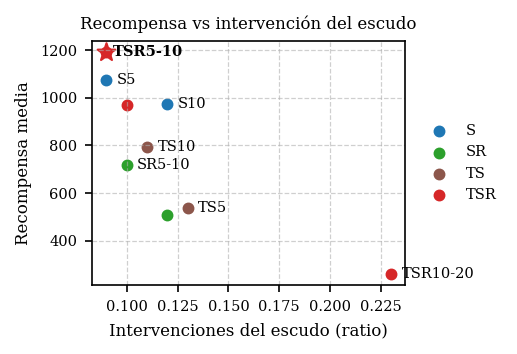

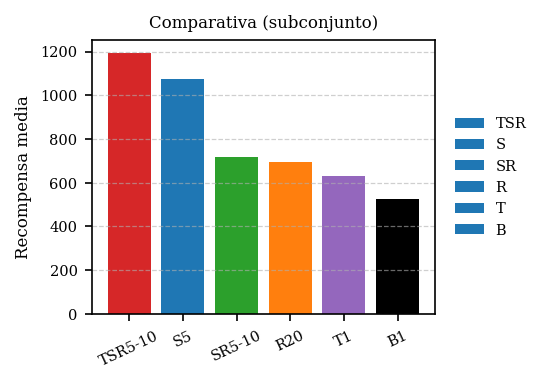

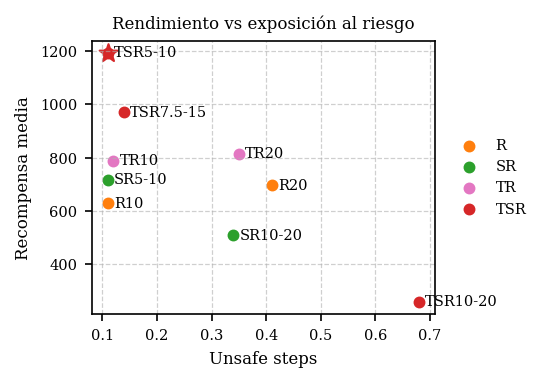

In [ ]:
import matplotlib.pyplot as plt


IEEE_MODE = "onecol"   

if IEEE_MODE == "onecol":
    FIG_W = 3.5    
    FIG_H = 2.4
elif IEEE_MODE == "twocol":
    FIG_W = 7.16   
    FIG_H = 3.0
else:
    raise ValueError("IEEE_MODE debe ser 'onecol' o 'twocol'")

plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.8,
    "figure.dpi": 150,
})


GROUP_COLORS = {
    "B":   "#000000",  # negro
    "S":   "#1f77b4",  # azul
    "R":   "#ff7f0e",  # naranja
    "SR":  "#2ca02c",  # verde
    "T":   "#9467bd",  # morado
    "TS":  "#8c564b",  # marrón
    "TR":  "#e377c2",  # rosa
    "TSR": "#d62728",  # rojo
    "Other": "#7f7f7f" # gris
}

def get_group(exp_id: str) -> str:
    if exp_id.startswith("TSR"): return "TSR"
    if exp_id.startswith("SR"):  return "SR"
    if exp_id.startswith("TS"):  return "TS"
    if exp_id.startswith("TR"):  return "TR"
    if exp_id.startswith("S"):   return "S"
    if exp_id.startswith("R"):   return "R"
    if exp_id.startswith("T"):   return "T"
    if exp_id.startswith("B"):   return "B"
    return "Other"

def save_ieee(fig, filename_base: str):

    fig.savefig(f"{filename_base}.pdf", bbox_inches="tight")
    fig.savefig(f"{filename_base}.png", bbox_inches="tight", dpi=300)

def legend_outside(ax):
    """Leyenda fuera del gráfico sin duplicados."""
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  
    ax.legend(
        by_label.values(),
        by_label.keys(),
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False
    )


data = [
    {"ID": "B1", "Rec": 526.00,  "Efic": 1.02, "PPM": 175.33, "Int": None, "UnSteps": None},

    {"ID": "S5",  "Rec": 1074.00, "Efic": 1.37, "PPM": 358.00, "Int": 0.09, "UnSteps": None},
    {"ID": "S10", "Rec": 975.50,  "Efic": 1.25, "PPM": 325.00, "Int": 0.12, "UnSteps": None},

    {"ID": "R10", "Rec": 629.0,  "Efic": 0.94, "PPM": 209.66, "Int": None, "UnSteps": 0.11},
    {"ID": "R20", "Rec": 696.5,  "Efic": 1.15, "PPM": 232.16, "Int": None, "UnSteps": 0.41},

    {"ID": "SR5-10",  "Rec": 718.00, "Efic": 1.06, "PPM": 239.33, "Int": 0.10, "UnSteps": 0.11},
    {"ID": "SR10-20", "Rec": 508.50, "Efic": 0.70, "PPM": 169.50, "Int": 0.12, "UnSteps": 0.34},

    {"ID": "T1", "Rec": 632.00, "Efic": 1.12, "PPM": 210.67, "Int": None, "UnSteps": None},

    {"ID": "TS5",  "Rec": 535.50, "Efic": 1.22, "PPM": 178.50, "Int": 0.13, "UnSteps": None},
    {"ID": "TS10", "Rec": 792.0,  "Efic": 0.98, "PPM": 264.00, "Int": 0.11, "UnSteps": None},

    {"ID": "TR10", "Rec": 788.5, "Efic": 1.24, "PPM": 262.83, "Int": None, "UnSteps": 0.12},
    {"ID": "TR20", "Rec": 815.5, "Efic": 1.22, "PPM": 271.83, "Int": None, "UnSteps": 0.35},

    {"ID": "TSR5-10",   "Rec": 1192.50, "Efic": 1.51, "PPM": 397.50, "Int": 0.09, "UnSteps": 0.11},
    {"ID": "TSR7.5-15", "Rec": 970.50,  "Efic": 1.29, "PPM": 323.49, "Int": 0.10, "UnSteps": 0.14},
    {"ID": "TSR10-20",  "Rec": 260.00,  "Efic": 0.77, "PPM": 86.66,  "Int": 0.23, "UnSteps": 0.68},
]


fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

ANNOTATE_IDS = {"S5", "SR5-10", "TSR10-20", "TS10", "TS5", "S10"}

for r in data:
    if r["Int"] is None:
        continue
    group = get_group(r["ID"])
    ax.scatter( r["Int"], r["Rec"], s=22 if IEEE_MODE == "onecol" else 30, color=GROUP_COLORS.get(group, GROUP_COLORS["Other"]), label=group )

    if r["ID"] in ANNOTATE_IDS:
        ax.annotate(
            r["ID"],
            (r["Int"], r["Rec"]),
            textcoords="offset points",
            xytext=(5, 0),
            fontsize=7,
            va="center"
        )


for r in data:
    if r["ID"] == "TSR5-10":
        ax.scatter(
            r["Int"], r["Rec"],
            s=80 if IEEE_MODE == "onecol" else 100,
            marker="*",
            color=GROUP_COLORS["TSR"]
        )
        ax.annotate("TSR5-10", (r["Int"], r["Rec"]), textcoords="offset points",
                    xytext=(3, 0), fontsize=7, va="center", fontweight = "bold")

ax.set_xlabel("Intervenciones del escudo (ratio)")
ax.set_ylabel("Recompensa media")
ax.set_title("Recompensa vs intervención del escudo")
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

legend_outside(ax)
fig.tight_layout()
save_ieee(fig, f"fig_tradeoff_int_{IEEE_MODE}")
plt.show()


keep_ids = ["B1", "S5", "R20", "T1", "SR5-10", "TSR5-10"]
subset = [r for r in data if r["ID"] in keep_ids]
subset.sort(key=lambda r: r["Rec"], reverse=True)

ids = [r["ID"] for r in subset]
recs = [r["Rec"] for r in subset]
groups = [get_group(i) for i in ids]
colors = [GROUP_COLORS.get(g, GROUP_COLORS["Other"]) for g in groups]

fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))
ax.bar(ids, recs, color=colors)

present_groups = []
for g in groups:
    if g not in present_groups:
        present_groups.append(g)

for g in present_groups:
    ax.bar([], [], color=GROUP_COLORS[g], label=g)  

ax.set_ylabel("Recompensa media")
ax.set_title("Comparativa (subconjunto)")
ax.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
ax.tick_params(axis="x", rotation=25)

legend_outside(ax)
fig.tight_layout(pad=0.2)
save_ieee(fig, f"fig_bar_rec_{IEEE_MODE}")
plt.show()


fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

for r in data:
    if r["UnSteps"] is None:
        continue
    group = get_group(r["ID"])
    ax.scatter(
        r["UnSteps"], r["Rec"],
        s=22 if IEEE_MODE == "onecol" else 30,
        color=GROUP_COLORS.get(group, GROUP_COLORS["Other"]),
        label=group
    )

    ax.annotate(r["ID"], (r["UnSteps"], r["Rec"]), textcoords="offset points",
                xytext=(3, 0), fontsize=7, va="center")


for r in data:
    if r["ID"] == "TSR5-10" and r["UnSteps"] is not None:
        ax.scatter(
            r["UnSteps"], r["Rec"],
            s=80 if IEEE_MODE == "onecol" else 100,
            marker="*",
            color=GROUP_COLORS["TSR"]
        )

ax.set_xlabel("Unsafe steps")
ax.set_ylabel("Recompensa media")
ax.set_title("Rendimiento vs exposición al riesgo")
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

legend_outside(ax)
fig.tight_layout(pad=0.2)
save_ieee(fig, f"fig_tradeoff_unsafe_{IEEE_MODE}")
plt.show()


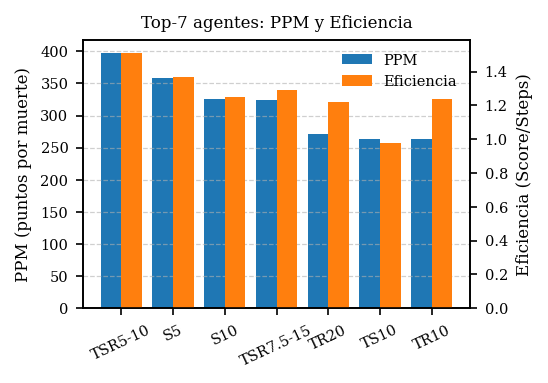

In [ ]:
import numpy as np


TOP_N = 7                 
RANK_BY = "Rec"          
BAR_W = 0.40             


COLOR_PPM  = "#1f77b4"    
COLOR_EFIC = "#ff7f0e"   

# Filtra y ordena (mejor -> peor)
valid = [r for r in data if (r.get("PPM") is not None and r.get("Efic") is not None)]
valid.sort(key=lambda r: r.get(RANK_BY, -np.inf), reverse=True)
subset = valid[:TOP_N]

ids  = [r["ID"] for r in subset]
ppm  = [r["PPM"] for r in subset]
efic = [r["Efic"] for r in subset]

x = np.arange(len(ids))

fig, ax1 = plt.subplots(figsize=(FIG_W, FIG_H))
ax2 = ax1.twinx()


bars_ppm  = ax1.bar(x - BAR_W/2, ppm,  width=BAR_W, color=COLOR_PPM,  label="PPM")
bars_efic = ax2.bar(x + BAR_W/2, efic, width=BAR_W, color=COLOR_EFIC, label="Eficiencia")


ax1.set_xticks(x)
ax1.set_xticklabels(ids, rotation=25)

ax1.set_ylabel("PPM (puntos por muerte)")
ax2.set_ylabel("Eficiencia (Score/Steps)")

ax1.set_title(f"Top-{TOP_N} agentes: PPM y Eficiencia")
ax1.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right", frameon=False)


if "TSR5-10" in ids:
    i = ids.index("TSR5-10")
    ax1.text(x[i] - BAR_W/2, ppm[i], "", ha="center", va="bottom", fontsize=10, fontweight="bold")

fig.tight_layout(pad=0.2)
save_ieee(fig, f"fig_bar_ppm_eff_top{TOP_N}_by_{RANK_BY}_{IEEE_MODE}")
plt.show()


## TRAINING

### ACUMULADO

✅ Registros: 600 | Model_ID distintos: 15
📌 IDs detectadas: ['B1', 'S5', 'S10', 'R10', 'R20', 'SR5-10', 'SR10-20', 'T1', 'TS5', 'TS10', 'TR10', 'TR20', 'TSR5-10', 'TSR7.5-15', 'TSR10-20']
✅ Guardado: graficas_resultados_ieee/1_muertes_onecol.pdf
✅ Guardado: graficas_resultados_ieee/1_muertes_onecol.png


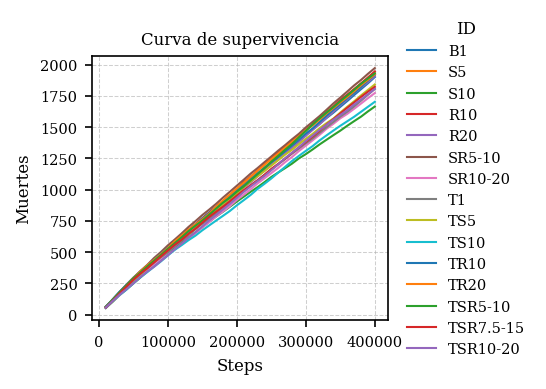

✅ Guardado: graficas_resultados_ieee/2_recompensa_onecol.pdf
✅ Guardado: graficas_resultados_ieee/2_recompensa_onecol.png


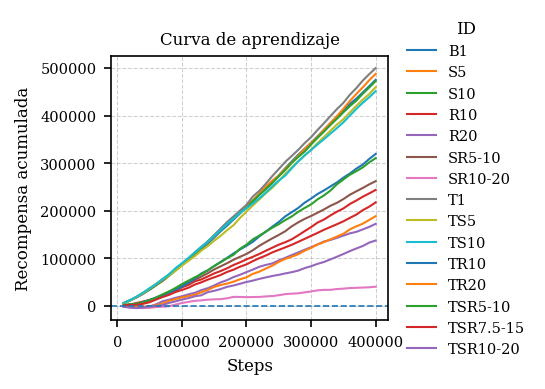

✅ Guardado: graficas_resultados_ieee/3_eficiencia_onecol.pdf
✅ Guardado: graficas_resultados_ieee/3_eficiencia_onecol.png


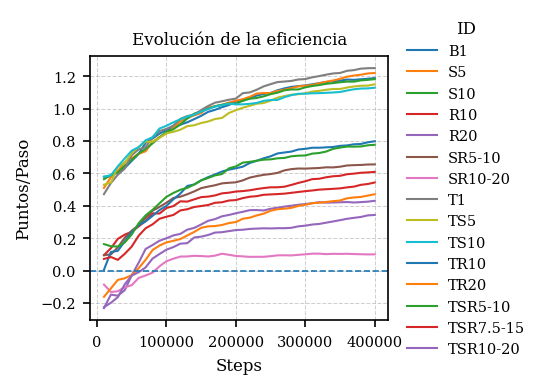

✅ Guardado: graficas_resultados_ieee/6_ppm_onecol.pdf
✅ Guardado: graficas_resultados_ieee/6_ppm_onecol.png


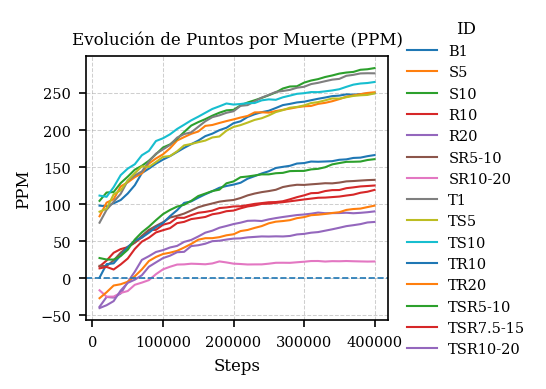

✅ Guardado: graficas_resultados_ieee/4_intervenciones_onecol.pdf
✅ Guardado: graficas_resultados_ieee/4_intervenciones_onecol.png


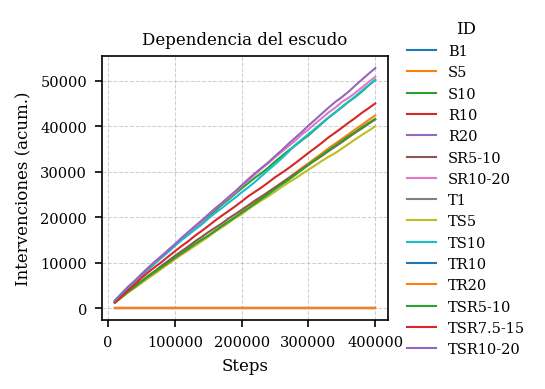

✅ Guardado: graficas_resultados_ieee/5_penalizaciones_onecol.pdf
✅ Guardado: graficas_resultados_ieee/5_penalizaciones_onecol.png


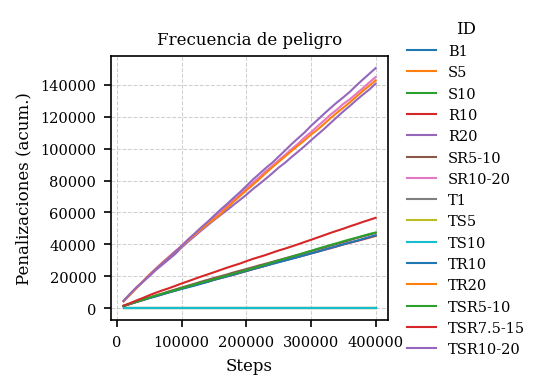


✨ Proceso finalizado.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


ARCHIVO_CSV = "/content/historial_training.csv"
CARPETA_GRAFICAS = "graficas_resultados_ieee"

IEEE_MODE = "onecol"  

if IEEE_MODE == "onecol":
    FIG_W, FIG_H = 3.5, 2.4
elif IEEE_MODE == "twocol":
    FIG_W, FIG_H = 7.16, 3.0
else:
    raise ValueError("IEEE_MODE debe ser 'onecol' o 'twocol'")

plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.8,
    "figure.dpi": 150,
})

ID_ORDER = [
    "B1",
    "S5", "S10",
    "R10", "R20",
    "SR5-10", "SR10-20",
    "T1",
    "TS5", "TS10",
    "TR10", "TR20",
    "TSR5-10", "TSR7.5-15", "TSR10-20"
]


def cargar_datos():
    if not os.path.exists(ARCHIVO_CSV):
        raise FileNotFoundError(f"No se encuentra el archivo '{ARCHIVO_CSV}'")
    df = pd.read_csv(ARCHIVO_CSV)

    required = {"Step", "Model_ID", "Imitation", "Shield_Active", "Shield_Dist", "Reward_Active", "Reward_Dist"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(
            "Faltan columnas necesarias en el CSV para construir las IDs: "
            + ", ".join(sorted(missing))
        )
    return df

def preparar_salida():
    os.makedirs(CARPETA_GRAFICAS, exist_ok=True)

def save_ieee(fig, filename_base: str):
    path_pdf = os.path.join(CARPETA_GRAFICAS, f"{filename_base}.pdf")
    path_png = os.path.join(CARPETA_GRAFICAS, f"{filename_base}.png")
    fig.savefig(path_pdf, bbox_inches="tight")
    fig.savefig(path_png, bbox_inches="tight", dpi=300)
    print(f"✅ Guardado: {path_pdf}")
    print(f"✅ Guardado: {path_png}")

def legend_outside(ax, title="Agente"):
    handles, labels = ax.get_legend_handles_labels()
    seen = set()
    new_h, new_l = [], []
    for h, l in zip(handles, labels):
        if l not in seen:
            new_h.append(h); new_l.append(l); seen.add(l)
    ax.legend(
        new_h, new_l,
        title=title,
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False
    )


def build_id_from_row(row) -> str:
    T = int(row["Imitation"]) == 1
    S = int(row["Shield_Active"]) == 1
    R = int(row["Reward_Active"]) == 1

    dS = float(row["Shield_Dist"]) if S else None
    dR = float(row["Reward_Dist"]) if R else None

    def fmt(x):

        if x is None:
            return None
        if abs(x - int(x)) < 1e-9:
            return str(int(x))
        return str(x)

    if (not T) and (not S) and (not R):
        return "B1"
    if (not T) and S and (not R):
        return f"S{fmt(dS)}"
    if (not T) and (not S) and R:
        return f"R{fmt(dR)}"
    if (not T) and S and R:
        return f"SR{fmt(dS)}-{fmt(dR)}"
    if T and (not S) and (not R):
        return "T1"
    if T and S and (not R):
        return f"TS{fmt(dS)}"
    if T and (not S) and R:
        return f"TR{fmt(dR)}"
    if T and S and R:
        return f"TSR{fmt(dS)}-{fmt(dR)}"

    return "Other"

def order_key(agent_id: str) -> int:
    if agent_id in ID_ORDER:
        return ID_ORDER.index(agent_id)
    return 999


def smooth_series(series, window=3):
    """
    Suavizado mediante media móvil centrada.
    window=3 equivale a ~30k pasos si el log es cada 10k.
    """
    return series.rolling(window=window, center=True, min_periods=1).mean()

def graficar_metrica(df, eje_y, titulo, etiqueta_y, nombre_archivo, legend_title="ID", type = "accumulated"):
    if eje_y not in df.columns:
        print(f"⚠️ Saltando '{eje_y}': no existe en el CSV.")
        return

    plot_df = df.copy()
    plot_df["Agent_ID"] = plot_df.apply(build_id_from_row, axis=1)


    agent_ids = sorted(plot_df["Agent_ID"].unique(), key=order_key)

    fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))

    for agent_id in agent_ids:
        sub = plot_df[plot_df["Agent_ID"] == agent_id].sort_values("Step")
        if type != "accumulated":
          y_smooth = smooth_series(sub[eje_y], window=4)
          ax.plot(sub["Step"], y_smooth, label=agent_id)
        else:
          ax.plot(sub["Step"], sub[eje_y], label=agent_id)

    ax.set_title(titulo)
    ax.set_xlabel("Steps")
    ax.set_ylabel(etiqueta_y)

    if plot_df[eje_y].min() < 0:
        ax.axhline(0, linewidth=0.8, linestyle="--")

    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    legend_outside(ax, title=legend_title)

    fig.tight_layout(pad=0.2)
    save_ieee(fig, nombre_archivo)
    plt.show()
    plt.close(fig)


if __name__ == "__main__":
    preparar_salida()
    df = cargar_datos()

    tmp_ids = sorted(df.apply(build_id_from_row, axis=1).unique(), key=order_key)
    print(f"✅ Registros: {len(df)} | Model_ID distintos: {df['Model_ID'].nunique()}")
    print("📌 IDs detectadas:", tmp_ids)

    graficar_metrica(df, "Deaths", "Curva de supervivencia", "Muertes", f"1_muertes_{IEEE_MODE}", legend_title="ID")
    graficar_metrica(df, "Reward_Accumulated", "Curva de aprendizaje", "Recompensa acumulada", f"2_recompensa_{IEEE_MODE}", legend_title="ID")
    graficar_metrica(df, "Efficiency", "Evolución de la eficiencia", "Puntos/Paso", f"3_eficiencia_{IEEE_MODE}", legend_title="ID")
    graficar_metrica(df, "PPM", "Evolución de Puntos por Muerte (PPM)", "PPM", f"6_ppm_{IEEE_MODE}", legend_title="ID")

    if "Interventions" in df.columns and df["Interventions"].sum() > 0:
        graficar_metrica(df, "Interventions", "Dependencia del escudo", "Intervenciones (acum.)", f"4_intervenciones_{IEEE_MODE}", legend_title="ID")

    if "Penalties" in df.columns and df["Penalties"].sum() > 0:
        graficar_metrica(df, "Penalties", "Frecuencia de peligro", "Penalizaciones (acum.)", f"5_penalizaciones_{IEEE_MODE}", legend_title="ID")

    print("\n✨ Proceso finalizado.")


### POR VENTANA

In [ ]:
import numpy as np

def convert_to_windows(df):
    """
    Convierte métricas acumuladas (hasta el step) a métricas por ventana
    usando diferencias (diff) por agente.
    Requiere que df tenga 'Agent_ID' y 'Step'.
    """

    dfw = df.copy()
    dfw = dfw.sort_values(["Agent_ID", "Step"]).reset_index(drop=True)

    dfw["Steps_window"] = dfw.groupby("Agent_ID")["Step"].diff()
    dfw["Steps_window"] = dfw["Steps_window"].fillna(dfw["Step"])  


    cumulative_cols = ["Reward_Accumulated", "Deaths", "Interventions", "Penalties"]
    for c in cumulative_cols:
        if c in dfw.columns:
            dfw[c + "_window"] = dfw.groupby("Agent_ID")[c].diff()
            dfw[c + "_window"] = dfw[c + "_window"].fillna(dfw[c])  

            dfw[c + "_window"] = dfw[c + "_window"].clip(lower=0)

    if "Reward_Accumulated_window" in dfw.columns:
        dfw["Efficiency_window"] = dfw["Reward_Accumulated_window"] / dfw["Steps_window"].replace(0, np.nan)

    if "Reward_Accumulated_window" in dfw.columns and "Deaths_window" in dfw.columns:
        deaths_w = dfw["Deaths_window"].replace(0, np.nan)
        dfw["PPM_window"] = dfw["Reward_Accumulated_window"] / deaths_w


    return dfw


plot_df = df.copy()
plot_df["Agent_ID"] = plot_df.apply(build_id_from_row, axis=1)

df_win = convert_to_windows(plot_df)







✅ Guardado: graficas_resultados_ieee/2_recompensa_win_onecol.pdf
✅ Guardado: graficas_resultados_ieee/2_recompensa_win_onecol.png


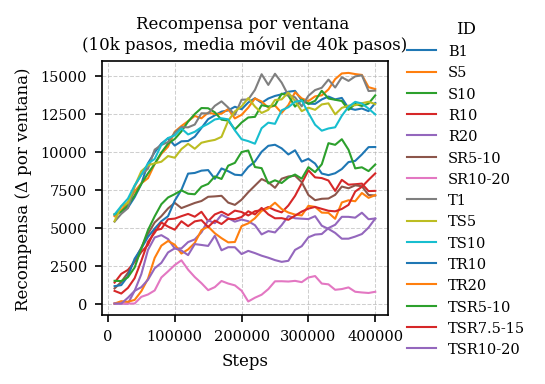

✅ Guardado: graficas_resultados_ieee/1_muertes_win_onecol.pdf
✅ Guardado: graficas_resultados_ieee/1_muertes_win_onecol.png


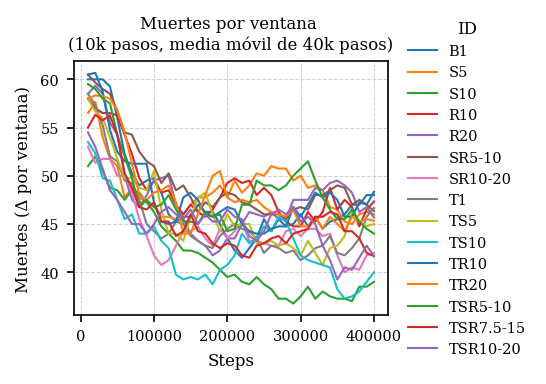

✅ Guardado: graficas_resultados_ieee/3_eficiencia_win_onecol.pdf
✅ Guardado: graficas_resultados_ieee/3_eficiencia_win_onecol.png


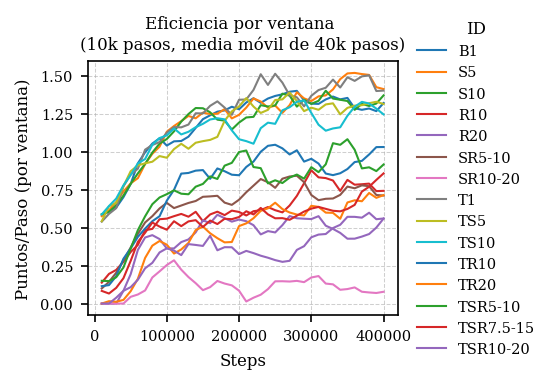

✅ Guardado: graficas_resultados_ieee/4_intervenciones_win_onecol.pdf
✅ Guardado: graficas_resultados_ieee/4_intervenciones_win_onecol.png


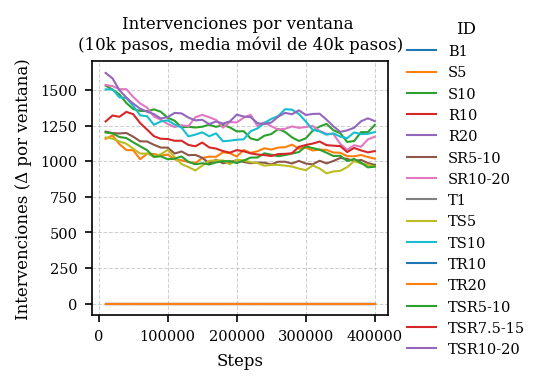

✅ Guardado: graficas_resultados_ieee/5_penalizaciones_win_onecol.pdf
✅ Guardado: graficas_resultados_ieee/5_penalizaciones_win_onecol.png


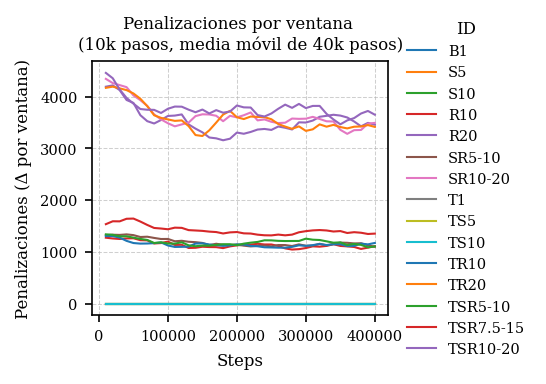

In [ ]:
graficar_metrica(df_win, "Reward_Accumulated_window",
                 "Recompensa por ventana \n(10k pasos, media móvil de 40k pasos)",
                 "Recompensa (Δ por ventana)", f"2_recompensa_win_{IEEE_MODE}", legend_title="ID", type = "a")
graficar_metrica(df_win, "Deaths_window",
                 "Muertes por ventana \n(10k pasos, media móvil de 40k pasos)",
                 "Muertes (Δ por ventana)", f"1_muertes_win_{IEEE_MODE}", legend_title="ID", type = "a")

graficar_metrica(df_win, "Efficiency_window",
                 "Eficiencia por ventana \n(10k pasos, media móvil de 40k pasos)",
                 "Puntos/Paso (por ventana)", f"3_eficiencia_win_{IEEE_MODE}", legend_title="ID", type = "a")

if "Interventions_window" in df_win.columns and df_win["Interventions_window"].sum() > 0:
    graficar_metrica(df_win, "Interventions_window",
                     "Intervenciones por ventana \n(10k pasos, media móvil de 40k pasos)",
                     "Intervenciones (Δ por ventana)", f"4_intervenciones_win_{IEEE_MODE}", legend_title="ID", type = "a")

if "Penalties_window" in df_win.columns and df_win["Penalties_window"].sum() > 0:
    graficar_metrica(df_win, "Penalties_window",
                     "Penalizaciones por ventana \n(10k pasos, media móvil de 40k pasos)",
                     "Penalizaciones (Δ por ventana)", f"5_penalizaciones_win_{IEEE_MODE}", legend_title="ID", type = "a")
import numpy as np

df["PPM_accumulated"] = np.where(
    df["Deaths"] > 0,
    df["Reward_Accumulated"] / df["Deaths"],
    np.nan
)






✅ Guardado: graficas_resultados_ieee/6_ppm_window_onecol.pdf
✅ Guardado: graficas_resultados_ieee/6_ppm_window_onecol.png


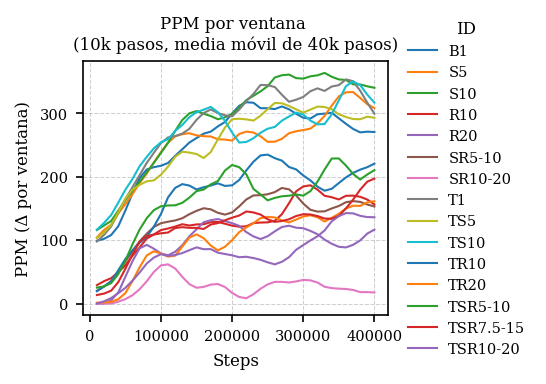

In [ ]:
def add_ppm_window_smoothed(df_win, window=3):
    """
    Calcula PPM por ventana de forma estable:
    rolling(sum(reward_window)) / rolling(sum(deaths_window))
    """
    df = df_win.copy()

    reward_roll = (
        df.groupby("Agent_ID")["Reward_Accumulated_window"]
          .rolling(window=window, center=True, min_periods=1)
          .sum()
          .reset_index(level=0, drop=True)
    )

    deaths_roll = (
        df.groupby("Agent_ID")["Deaths_window"]
          .rolling(window=window, center=True, min_periods=1)
          .sum()
          .reset_index(level=0, drop=True)
    )

    df["PPM_window"] = reward_roll / deaths_roll.replace(0, np.nan)

    return df

df_win = convert_to_windows(plot_df)
df_win = add_ppm_window_smoothed(df_win, window=3) 
graficar_metrica(
    df_win,
    "PPM_window",
    "PPM por ventana \n(10k pasos, media móvil de 40k pasos)",
    "PPM (Δ por ventana)",
    f"6_ppm_window_{IEEE_MODE}",
    legend_title="ID",
    type="a"
)


# EVAL


In [ ]:

import glob
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

IEEE_MODE = "onecol"
FIG_W, FIG_H = (3.5, 2.4) if IEEE_MODE == "onecol" else (7.16, 3.0)

plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.8,
    "figure.dpi": 150,
})

GROUP_COLORS = {
    "B": "#000000", "S": "#1f77b4", "R": "#ff7f0e", "SR": "#2ca02c",
    "T": "#9467bd", "TS": "#8c564b", "TR": "#e377c2", "TSR": "#d62728",
    "OTHER": "#7f7f7f"
}

def save_png(fig, filename_base: str):
    Path(filename_base).parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(f"{filename_base}.png", bbox_inches="tight", dpi=300)

def legend_outside(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    if by_label:
        ax.legend(by_label.values(), by_label.keys(),
                  loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

DATA_DIR = Path("validacion")
OUT_DIR = Path("graficas_resultados")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def to_float(x):
    try:
        if pd.isna(x): return np.nan
        if isinstance(x, str):
            x2 = x.strip().replace(",", ".")
            if x2 == "": return np.nan
            return float(x2)
        return float(x)
    except Exception:
        return np.nan

def get_media_row(df):
    if "Episodio" in df.columns:
        mask = df["Episodio"].astype(str).str.upper().eq("MEDIA")
        if mask.any(): return df.loc[mask].copy()
    return df.tail(1).copy()

def has_teacher(model_str):
    if not isinstance(model_str, str): return False
    m = model_str.lower()
    return ("imitation" in m) or ("teacher" in m)

def fmt_delta(x):
    if pd.isna(x): return None
    return int(x) if float(x).is_integer() else x

def build_config_id(has_T, has_S, dS, has_R, dR):
    dS_f, dR_f = fmt_delta(dS), fmt_delta(dR)
    if not has_T and not has_S and not has_R: return "B1"
    if has_T and not has_S and not has_R: return "T1"
    if has_S and not has_R and not has_T: return f"S{dS_f}" if dS_f else "S"
    if has_R and not has_S and not has_T: return f"R{dR_f}" if dR_f else "R"
    if has_S and has_R and not has_T: return f"SR{dS_f}-{dR_f}"
    if has_T and has_S and not has_R: return f"TS{dS_f}" if dS_f else "TS"
    if has_T and has_R and not has_S: return f"TR{dR_f}" if dR_f else "TR"
    if has_T and has_S and has_R: return f"TSR{dS_f}-{dR_f}"
    return "OTHER"

def group_from_id(config_id):
    s = str(config_id).strip().upper()
    if s.startswith("TSR"): return "TSR"
    if s.startswith("SR"): return "SR"
    if s.startswith("TR"): return "TR"
    if s.startswith("TS"): return "TS"
    if s.startswith("R"): return "R"
    if s.startswith("S"): return "S"
    if s.startswith("T"): return "T"
    if s.startswith("B"): return "B"
    return "OTHER"

csv_files = sorted(glob.glob(str(DATA_DIR / "*.csv")))
if not csv_files: raise FileNotFoundError(f"No se encontraron CSVs en {DATA_DIR.resolve()}")

media_rows, episodes_rows = [], []

for f in csv_files:
    df = pd.read_csv(f)
    df.columns = [c.strip() for c in df.columns]

    media = get_media_row(df)
    for c in ["Recompensa","Eficiencia_Pto_Paso","Puntos_por_muerte","Intervenciones",
              "UnsafeRatio","Distancia_Recompensa","Distancia_Escudo"]:
        if c in media.columns: media[c] = media[c].apply(to_float)

    T = has_teacher(media["Modelo"].iloc[0]) if "Modelo" in media.columns else False
    dS = to_float(media.get("Distancia_Escudo", np.nan).iloc[0])
    dR = to_float(media.get("Distancia_Recompensa", np.nan).iloc[0])

    S_flag = False
    if "Con_Escudo" in media.columns:
        S_flag = str(media["Con_Escudo"].iloc[0]).strip().lower() in {"true","1","t","yes","y"}
    has_S = S_flag and (not pd.isna(dS) and dS > 0)
    has_R = (not pd.isna(dR)) and (dR > 0)

    cfg_id = build_config_id(T, has_S, dS, has_R, dR)
    grupo = group_from_id(cfg_id)

    media["ConfigID"], media["Grupo"], media["Archivo"] = cfg_id, grupo, Path(f).name
    media_rows.append(media)

    df_ep = df[~df["Episodio"].astype(str).str.upper().eq("MEDIA")].copy() if "Episodio" in df.columns else df.copy()
    for c in ["Recompensa","Eficiencia_Pto_Paso","Puntos_por_muerte","Intervenciones","UnsafeRatio"]:
        if c in df_ep.columns: df_ep[c] = df_ep[c].apply(to_float)
    df_ep["ConfigID"], df_ep["Grupo"] = cfg_id, grupo
    episodes_rows.append(df_ep)

df_media = pd.concat(media_rows, ignore_index=True)
df_eps = pd.concat(episodes_rows, ignore_index=True)

agg_path = OUT_DIR / "validacion_aggregado.csv"
df_media.to_csv(agg_path, index=False)
print(f"Guardado CSV agregado: {agg_path.resolve()}")

print("\nResumen ConfigID -> Grupo:")
print(df_media[["ConfigID","Grupo"]].drop_duplicates().sort_values("ConfigID").to_string(index=False))

has_R_media = df_media[(df_media["Distancia_Recompensa"] > 0) & (df_media["UnsafeRatio"] > 0)].copy()
has_R_eps = df_eps[(df_eps["Distancia_Recompensa"] > 0) & (df_eps["UnsafeRatio"] > 0)].copy()


if not has_R_eps.empty:
    order = has_R_eps.groupby("ConfigID")["UnsafeRatio"].median().sort_values().index.tolist()
    fig, ax = plt.subplots(figsize=(FIG_W * 1.5, FIG_H))
    sns.boxplot(data=has_R_eps, x="UnsafeRatio", y="ConfigID", order=order, color="#87CEEB", ax=ax)
    sns.stripplot(data=has_R_eps, x="UnsafeRatio", y="ConfigID", order=order, color="k", alpha=0.35, size=1.8, jitter=0.15, ax=ax)
    ax.set_xlabel("Inseguridad (UnsafeRatio)")
    ax.set_ylabel("Configuración")
    ax.set_title("Distribución de UnsafeRatio por configuración (episodios, solo R)")
    ax.grid(True, axis="x", linestyle="--", linewidth=0.6, alpha=0.6)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
        spine.set_edgecolor("black")
    fig.tight_layout(pad=0.2)
    save_png(fig, str(OUT_DIR / f"boxplot_unsafe_ratio_por_config_{IEEE_MODE}"))
    plt.close(fig)


if not has_R_media.empty:
    fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))
    for _, r in has_R_media.iterrows():
        gid, grp = r["ConfigID"], r["Grupo"]
        color = GROUP_COLORS.get(grp, GROUP_COLORS["OTHER"])
        ax.scatter(r["Eficiencia_Pto_Paso"], r["UnsafeRatio"], s=22, color=color, label=grp)
        ax.annotate(gid, (r["Eficiencia_Pto_Paso"], r["UnsafeRatio"]), textcoords="offset points", xytext=(3, 0), fontsize=5)

    best_model = "TSR5-10"
    r_star = has_R_media[has_R_media["ConfigID"] == best_model]
    if not r_star.empty:
        r0 = r_star.iloc[0]
        ax.scatter(r0["Eficiencia_Pto_Paso"], r0["UnsafeRatio"],
                   s=80 if IEEE_MODE == "onecol" else 120,
                   marker="*",
                   color=GROUP_COLORS.get("TSR", "#d62728"),
                   edgecolor="black", linewidth=0.8)
    ax.set_xlabel("Eficiencia (puntos por paso)")
    ax.set_ylabel("Inseguridad (UnsafeRatio)")
    ax.set_title("Eficiencia vs Inseguridad (medias por configuración, solo R)")
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
 
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
        spine.set_edgecolor("black")
    legend_outside(ax)
    fig.tight_layout(pad=0.2)
    save_png(fig, str(OUT_DIR / f"scatter_eficiencia_vs_unsafe_{IEEE_MODE}"))
    plt.close(fig)

df_sc_ppm = has_R_media.dropna(subset=["Puntos_por_muerte"])
if not df_sc_ppm.empty:
    fig, ax = plt.subplots(figsize=(FIG_W, FIG_H))
    for _, r in df_sc_ppm.iterrows():
        gid, grp = r["ConfigID"], r["Grupo"]
        color = GROUP_COLORS.get(grp, GROUP_COLORS["OTHER"])
        ax.scatter(r["UnsafeRatio"], r["Puntos_por_muerte"], s=22, color=color, label=grp)
        ax.annotate(gid, (r["UnsafeRatio"], r["Puntos_por_muerte"]), textcoords="offset points", xytext=(3, 0), fontsize=5)
  
    best_model = "TSR5-10"
    r_star = df_sc_ppm[df_sc_ppm["ConfigID"] == best_model]
    if not r_star.empty:
        r0 = r_star.iloc[0]
        ax.scatter(r0["UnsafeRatio"], r0["Puntos_por_muerte"],
                   s=80 if IEEE_MODE == "onecol" else 120,
                   marker="*",
                   color=GROUP_COLORS.get("TSR", "#d62728"),
                   edgecolor="black", linewidth=0.8)
    ax.set_xlabel("Inseguridad (UnsafeRatio)")
    ax.set_ylabel("Puntos por muerte (PPM)")
    ax.set_title("Inseguridad vs PPM (medias por configuración, solo R)")
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
  
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.8)
        spine.set_edgecolor("black")
    legend_outside(ax)
    fig.tight_layout(pad=0.2)
    save_png(fig, str(OUT_DIR / f"scatter_unsafe_vs_ppm_{IEEE_MODE}"))
    plt.close(fig)


Guardado CSV agregado: C:\Users\cgallardo\Desktop\RL-practica\graficas_resultados\validacion_aggregado.csv

Resumen ConfigID -> Grupo:
 ConfigID Grupo
       B1     B
      R10     R
      R20     R
      S10     S
       S5     S
  SR10-20    SR
   SR5-10    SR
       T1     T
     TR10    TR
     TR20    TR
      TS5    TS
 TSR10-20   TSR
 TSR10-25   TSR
  TSR5-10   TSR
TSR7.5-15   TSR
